In [ ]:
import numpy as np
import pandas as pd
import cv2
import seaborn as sns
import matplotlib.pyplot as plt
from PIL import Image
from google.colab.patches import cv2_imshow
import tensorflow as tf
from tensorflow import keras
tf.random.set_seed(3)
from keras.datasets import mnist
from tensorflow.math import confusion_matrix

In [ ]:
(X_train, Y_train), (X_test, Y_test) = mnist.load_data()

11490434/11490434 [==============================] - 1s 0us/step


In [ ]:
type( X_train)

numpy.ndarray

In [ ]:
print( X_train.shape)

(60000, 28, 28)


Training data = 60,000
Test data = 10,000 images

Image dimesion = 28x28
GraySclae images -> 1 channe;

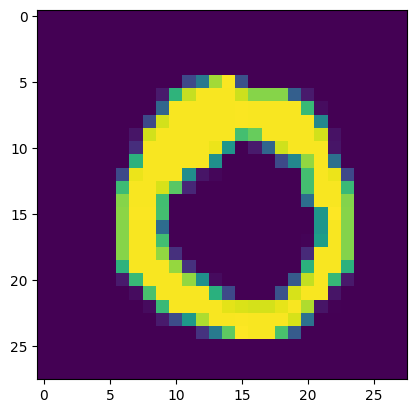

In [ ]:
plt.imshow(X_train[56])



In [ ]:
print( np.unique(Y_train) )
print( np.unique(Y_test))

[0 1 2 3 4 5 6 7 8 9]
[0 1 2 3 4 5 6 7 8 9]


In [ ]:
X_train = X_train /255
X_test = X_test / 255

In [ ]:
#  setting up NN
model = keras.Sequential([
    keras.layers.Flatten( input_shape = (28, 28)),
    keras.layers.Dense( 50, activation = 'relu'),
    keras.layers.Dense( 50, activation = 'relu'),
    keras.layers.Dense( 10, activation = 'sigmoid')
])

In [ ]:
model.compile(
    optimizer = 'adam',
    loss = 'sparse_categorical_crossentropy',
    metrics = ['accuracy']
)

In [ ]:
model.fit( X_train, Y_train, epochs = 10)

Epoch 1/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.2971 - accuracy: 0.9147
Epoch 2/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.1350 - accuracy: 0.9597
Epoch 3/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1003 - accuracy: 0.9696
Epoch 4/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0811 - accuracy: 0.9746
Epoch 5/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0687 - accuracy: 0.9788
Epoch 6/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.0577 - accuracy: 0.9814
Epoch 7/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0505 - accuracy: 0.9834
Epoch 8/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0437 - accuracy: 0.9862
Epoch 9/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0400 - accuracy: 0.9866
Epoch 10/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.035

In [ ]:
loss, accuracy = model.evaluate( X_test, Y_test)
print( accuracy)

313/313 [==============================] - 1s 3ms/step - loss: 0.0982 - accuracy: 0.9730
0.9729999899864197


In [ ]:
Y_pred = model.predict(X_test)

313/313 [==============================] - 1s 4ms/step


In [ ]:
print( Y_pred.shape)

(10000, 10)


In [ ]:
Y_pred_labels = [ np.argmax(i) for i in Y_pred]
print( Y_pred_labels)

[7, 2, 1, 0, 4, 1, 4, 9, 5, 9, 0, 6, 9, 0, 1, 5, 9, 7, 3, 4, 9, 6, 6, 5, 4, 0, 7, 4, 0, 1, 3, 1, 3, 4, 7, 2, 7, 1, 2, 1, 1, 7, 4, 2, 3, 5, 1, 2, 4, 4, 6, 3, 5, 5, 6, 0, 4, 1, 9, 5, 7, 8, 9, 3, 7, 4, 6, 4, 3, 0, 7, 0, 2, 9, 1, 7, 3, 2, 9, 7, 7, 6, 2, 7, 8, 4, 7, 3, 6, 1, 3, 6, 9, 3, 1, 4, 1, 7, 6, 9, 6, 0, 5, 4, 5, 9, 2, 1, 9, 4, 8, 7, 3, 9, 7, 9, 4, 4, 9, 2, 5, 4, 7, 6, 7, 9, 0, 5, 8, 5, 6, 6, 5, 7, 8, 1, 0, 1, 6, 4, 6, 7, 3, 1, 7, 1, 8, 2, 0, 2, 9, 8, 5, 5, 1, 5, 6, 0, 3, 4, 4, 6, 5, 4, 6, 5, 4, 5, 1, 4, 4, 7, 2, 3, 2, 7, 1, 8, 1, 8, 1, 8, 5, 0, 8, 9, 2, 5, 0, 1, 1, 1, 0, 9, 0, 3, 1, 6, 4, 2, 3, 6, 1, 1, 1, 3, 9, 5, 2, 9, 4, 5, 9, 3, 9, 0, 3, 6, 5, 5, 7, 2, 2, 7, 1, 2, 8, 4, 1, 7, 3, 3, 8, 8, 7, 9, 2, 2, 4, 1, 5, 8, 8, 7, 2, 3, 0, 6, 4, 2, 4, 1, 9, 5, 7, 7, 2, 8, 2, 0, 8, 5, 7, 7, 9, 1, 8, 1, 8, 0, 3, 0, 1, 9, 9, 4, 1, 8, 2, 1, 2, 9, 7, 5, 9, 2, 6, 4, 1, 5, 8, 2, 9, 2, 0, 4, 0, 0, 2, 8, 4, 7, 1, 2, 4, 0, 2, 7, 4, 3, 3, 0, 0, 3, 1, 9, 6, 5, 2, 5, 9, 7, 9, 3, 0, 4, 2, 0, 7, 1, 1, 2, 1, 

In [ ]:
conf_mat = confusion_matrix( Y_test, Y_pred_labels)
print( conf_mat)

tf.Tensor(
[[ 967    0    3    1    1    1    4    1    2    0]
 [   0 1124    2    3    0    2    2    1    1    0]
 [   3    3 1006    5    0    2    3    6    4    0]
 [   0    0    7  983    0    5    0    4    7    4]
 [   1    0    1    1  948    2    6    6    0   17]
 [   2    0    0   13    1  861    5    1    7    2]
 [   5    2    3    1    2    4  940    0    1    0]
 [   0    6   11    0    2    1    0  999    1    8]
 [   2    2    3    5    4   10    2    4  939    3]
 [   1    4    0    9    9    5    1   12    5  963]], shape=(10, 10), dtype=int32)


**bold text**

predictive system

In [ ]:
input_image_path = input( 'path of image to be predicted')
input_image = cv2.imread(input_image_path)
cv2_imshow(input_image)

grayscale = cv2.cvtcolor(input_image, cv2.COLOR_RGB2GRAY)

input_image_resize = cv2.resize(grascale, (28, 28))

input_image_resize = input_image_resize / 255

image_reshaped = np.reshape(input_image_resize, [1, 28, 28])

input_prediction = model.predict(image_reshaped)

input_pred_label = np.argmax(input_prediction)

print(input_pred_label)